In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!mkdir ../data/preprocessed
!mkdir ../Algorithms

df = pd.read_csv("../data/start-data.csv")

df = df.drop(columns=['cold_item','frozen_item'])

mkdir: ../data/preprocessed: File exists
mkdir: ../Algorithms: File exists


# Data Preprocessing

## Feature Engineering

### Creating New Features From Category Names

In [2]:
category = {
    "Snacks": [
        "Tablet Çikolata",
        "Kraker",
        "Kuruyemiş",
        "Bisküvi",
        "Tablet",
        "Hediyelik Çikolata",
        "Baton Çikolata",
        "Draje",
        "Baton",
        "Bar Çikolata",
        "Gofret",
        "Cips",
        "Çocuklara Özel",
        "Sakız & Şekerleme",
        "Çikolata",
        "Sakız",
        "Şekerleme",
        "Kuru Meyve",
    ],
    "Baby": [
        "Bebek Bezi",
        "Bebek Maması",
        "Bebek Bakım",
        "Bakım",
        "Bebek Deterjanı ve Yumuşatıcısı",
        "Bebek Banyo",
        "Bebek Beslenme",
        "Anne Ürünleri",

    ],
    "Icecream": [
        "Tek Dondurma",
        "Kap Dondurma",
        "Migros Dondurma",
        "Buz"
    ],
    "Frozen_food": [
        "Mantı",
        "Pizza",
        "Pide Lahmacun",
        "Patates",
        "Meyve-Sebze",
        "Milföy",
        "Dondurulmuş"
    ],
    "Meat&Fish": [
        "Beyaz Et",
        "Kırmızı Et",
        "Et Şarküteri",
        "Deniz Ürünleri",
        "Sakatat",
        "Köfte",
        "Balık",
    ],
    "Home_Care": [
        "Oto Aksesuar",
        "Böcek İlacı",
        "Ev Tekstili",
        "Kullan At",
        "Hırdavat",
        "Ayakkabı Bakım",
        "Züccaciye",
        "Piknik & Kamp",
        "Çiçek",
        "Yapay Çiçek",
        "Canlı Bitki",
        "Ampul",
        "Bahçe Malzemeleri",
        "Dekorasyon",
        "Mutfak Eşyaları",
        "Mutfak",
        "Isıtma",
        "Soğutma",
        "Spor",
        "Outdoor",
        "Yetiştirme Kiti",
    ],
    "Pet": [
        "Kedi",
        "Kuş",
        "Köpek",
        "Pet Aksesuarları",
    ],
    "Bakery": [
        "Gevrek Ekmek",
        "Donuk Fırın",
        "Unlu Mamüller",
        "Ekmek",
        "Taze Fırın",
        "Kek",
        "Tatlı",
        "Pasta Malzemeleri",
        "Hamur",
        "Krema",
        "Sütlü Tatlı",
        "Kuru Pasta",
        "Pasta",
        "Erişte",
        "Yufka",
        "Gevrek",
        "Grissini",
        "Galeta",
        "Harç",
        "Sabah Sıcakları",
        "Puding & Pasta",

    ],
    "Clothing&Accessory": [
        "Aksesuar",
        "Erkek",
        "Kadın",
        "Giyim",
    ],
    "ConvenienceFood&Appetizers": [
        "Migros Ev Lezzetleri",
        "Hızlı Yemek",
        "Sandviç",
        "Dondurulmuş Gıda",
        "Meze",
        "Pratik Yemek",
        "Paketli Sandviç",
    ],
    "Hobby&Game": [
        "Gazete",
        "Dergi",
        "Oyun",
        "Kitap",
        "Kırtasiye",
        "Kartlar",
        "Müzik",
        "Oyuncak",
    ],
    "Drinks": [
        "Soğuk Çay",
        "Ayran & Kefir",
        "Soğuk Kahve",
        "Şalgam",
        "Kahve",
        "Maden Suyu",
        "Sporcu İçeceği",
        "Çay",
        "Enerji İçeceği",
        "Gazlı İçecek",
        "Boza & Salep",
        "Meyve Suyu",
        "Su",
        "Gazsız İçecek"
    ],
    "Personal_Care&Cosmetics": [
        "Duş & Banyo",
        "Kolonya",
        "Makyaj & Cilt Bakım",
        "Tıraş Ürünleri",
        "Saç Bakım",
        "Hijyenik Pedler",
        "Ağız Bakım",
        "Tüy Dökücüler",
        "Güneş Kremi",
        "Saç Boyası",
        "Parfüm & Deodorant",
        "Banyo",
        "Ağda",
        "Tıraş Malzemeleri",
        "Ağız Bakım Ürünleri",
        "Deodorant",
        "Parfüm",
        "Epilasyon",
        "Hijyenik Ped",
        "Cilt Bakımı",
        "Makyaj",

    ],
    "Fruits&Vegetables": [
        "Sebze",
        "Meyve",
        "Yeşillik"
    ],
    "Health": [
        "Cinsel Sağlık",
        "Kişisel Sağlık",
        "Sağlık Ürünleri",
        "Sağlık Takviyeleri",
        "Genel Sağlık",
        "Prezervatif",
        "Jel"
    ],
    "Healthy_Living": [
        "Organik",
        "Bar",
        "Glutensiz",
        "Diyabetik Ürünler",
        "Sağlıklı Yaşam Ürünleri",
    ],
    "Milk&Breakfast": [
        "Peynir",
        "Margarin",
        "Tereyağ",
        "Bal",
        "Bal & Reçel",
        "Tereyağ & Margarin",
        "Süt",
        "Gevrekler",
        "Yoğurt",
        "Reçel",
        "Çikolata & Kahvaltı",
        "Zeytin",
        "Yumurta",
        "Tereyağı",
        "Kahvaltılık",
        "Kahvaltılıklar",
    ],
    "Technology": [
        "Aydınlatma",
        "Şarj & Kablo",
        "Pil",
        "Elektrikli Alet",
        "Elektronik",
        "Bilgisayar ve Aksesuarları",
        "Elektrikli Ev Aletleri",
        "Görüntü ve Ses Sistemleri",
        "Elektrik Malzemeleri",
        "Telefon ve Aksesuarları",
    ],
    "Staple_Food": [
        "Baharat",
        "Turşu",
        "Sıvı Yağ",
        "Sirke",
        "Makarna",
        "Sirke & Sos",
        "Şeker",
        "Çorba & Bulyon",
        "Konserve & Turşu",
        "Un",
        "Konserve",
        "Bakliyat",
        "Özel Paket",
        "Sos",
        "Bulyon",
        "Tuz",
    ],
    "Cleaning&Household_Supplies": [
        "Kağıt",
        "Bulaşık",
        "Sabun",
        "Temizlik",
        "Çamaşır",
        "Oda & Oto Kokuları",
        "Çamaşır Gereçleri",
        "Genel Temizlik",
        "Bulaşık Yıkama",
        "Temizlik Malzemeleri",
        "Çamaşır Yıkama",
        "Kağıt Ürünleri",
        "Banyo Gereçleri",
        "Duş",
        "Çöp Poşeti",
    ],
    "Special_Days": [
        "Yılbaşı Kutusu",
        "Yılbaşı Özel",
        "Ramazan Paketleri",
        "Ramazan Özel",
        "Ramazan Paketi",
        "Fırsatlar Dünyası",
    ],
    "Others": [
        "Diğer",
        "Kaplamalılar",
        "Kuponlar",
    ]
}

In [3]:
'''
# This function checks if any item types are present in the given category names.

# Arguments:
#   category_names (str): A comma-separated string containing category names.
#   item_types (iterable): An iterable collection of item types to search for.

# Returns:
#   int: The number of item types found in the category names.
'''
def contains_items(category_names, item_types):
    if isinstance(category_names, str):
        categories = category_names.split(',')
        item_count = 0
        for category in categories:
            if any(item.strip() in item_types for item in category.split(',')):
                item_count += 1
        return item_count
    else:
        return 0
    


In [4]:
#Apply a forloop for category dictionary and create a new column for each category using the contains_items function
for key, value in category.items():
    df[key] = df["category_names"].apply(lambda x: contains_items(x, value))
    print(key, "column added to df")
# Add a new column 'total_unique_number_of_categories_in_row'

Snacks column added to df
Baby column added to df
Icecream column added to df
Frozen_food column added to df
Meat&Fish column added to df
Home_Care column added to df
Pet column added to df
Bakery column added to df
Clothing&Accessory column added to df
ConvenienceFood&Appetizers column added to df
Hobby&Game column added to df
Drinks column added to df
Personal_Care&Cosmetics column added to df
Fruits&Vegetables column added to df
Health column added to df
Healthy_Living column added to df
Milk&Breakfast column added to df
Technology column added to df
Staple_Food column added to df
Cleaning&Household_Supplies column added to df
Special_Days column added to df
Others column added to df


In [5]:
# Find the total number of unique categories based on the condition that the values of the keys in the category dictionary of Df are greater than 1, and add a new column.
df['unique_category_count'] = df[category.keys()].apply(lambda x: x[x > 0].count(), axis=1)

In [6]:
df

,packet_date,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,Snacks,Baby,...,Fruits&Vegetables,Health,Healthy_Living,Milk&Breakfast,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count
0,2023-01-30 16:25:56.531971 UTC,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,0,...,6,0,0,6,0,7,0,0,0,5
1,2023-01-13 17:39:56.963085 UTC,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,...,11,0,0,0,0,3,0,0,0,4
2,2023-12-16 13:39:03.726051 UTC,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,0,...,1,0,0,3,0,1,0,0,0,8
3,2023-02-11 13:37:56.262404 UTC,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",4,0,...,2,0,1,1,0,1,1,0,1,11
4,2023-01-04 10:36:28.288366 UTC,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,0,...,4,0,0,3,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,2023-05-14 22:03:55.03007 UTC,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,0,...,8,0,0,1,0,2,1,0,0,7
1438814,2023-05-02 09:03:42.533162 UTC,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,...,0,0,0,7,0,0,0,0,0,5
1438815,2023-02-13 15:23:39.449954 UTC,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,...,2,0,0,1,0,3,2,0,0,8
1438816,2023-03-26 17:25:06.829762 UTC,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,...,8,0,0,1,0,0,2,0,0,7


### Creating New Features From Packet Dates

In [7]:
# Convert the 'packet_date' column to datetime
df['packet_date'] = pd.to_datetime(df['packet_date'], format='%Y-%m-%d %H:%M:%S.%f %Z')

# Extract the month, day of the week, and hour from the 'packet_date' column
df['month'] = df['packet_date'].dt.month
df['day'] = df['packet_date'].dt.dayofweek
df['hour'] = df['packet_date'].dt.hour

print("Columns month, day, and hour added to df")

Columns month, day, and hour added to df


In [8]:
# check if the packet_date column contains holidays
import holidays

tr_holidays = holidays.Turkey()
df['is_holiday'] = df['packet_date'].apply(lambda x: 1 if x in tr_holidays else 0)
print("is_holiday column added to order_date.csv.")
#check how many holiday orders are there in the dataset
df.drop(columns=['packet_date'], inplace=True)
print("Number of holidays in the dataset: ", df['is_holiday'].sum())

is_holiday column added to order_date.csv.
Number of holidays in the dataset:  45145


In [9]:
print("Number of holidays in the dataset: ", df['is_vip'].sum())

Number of holidays in the dataset:  4423


In [10]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,Snacks,Baby,Icecream,...,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count,month,day,hour,is_holiday
0,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,0,0,...,0,7,0,0,0,5,1,0,16,0
1,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,0,...,0,3,0,0,0,4,1,4,17,0
2,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,0,0,...,0,1,0,0,0,8,12,5,13,0
3,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",4,0,0,...,0,1,1,0,1,11,2,5,13,0
4,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,0,0,...,0,0,0,0,0,5,1,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,0,0,...,0,2,1,0,0,7,5,6,22,0
1438814,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,0,0,0,5,5,1,9,0
1438815,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,3,2,0,0,8,2,0,15,0
1438816,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,2,0,0,7,3,6,17,0


## Data Cleaning

### Removing Outliers

In [11]:
# Get the number of rows before filtering
num_rows_before = df.shape[0]

# Below 1 min collection durations are not possible and above 30 min collection durations are not delivered.
df = df[(df['collection_duration'] > 1) & (df['collection_duration'] < 30)]

# Get the number of rows after filtering
num_rows_after = df.shape[0]

# Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

print("Number of rows removed:", num_rows_removed)

Number of rows removed: 21868


Since the dataset is real life data, we need to remove it sensibly. So we will use the IQR method with multivariate outlier detection. As a Our target and our features.

In [12]:
cols = df.columns.difference(['order_id', 'is_vip', 'is_holiday','package_id','units','category_names'])

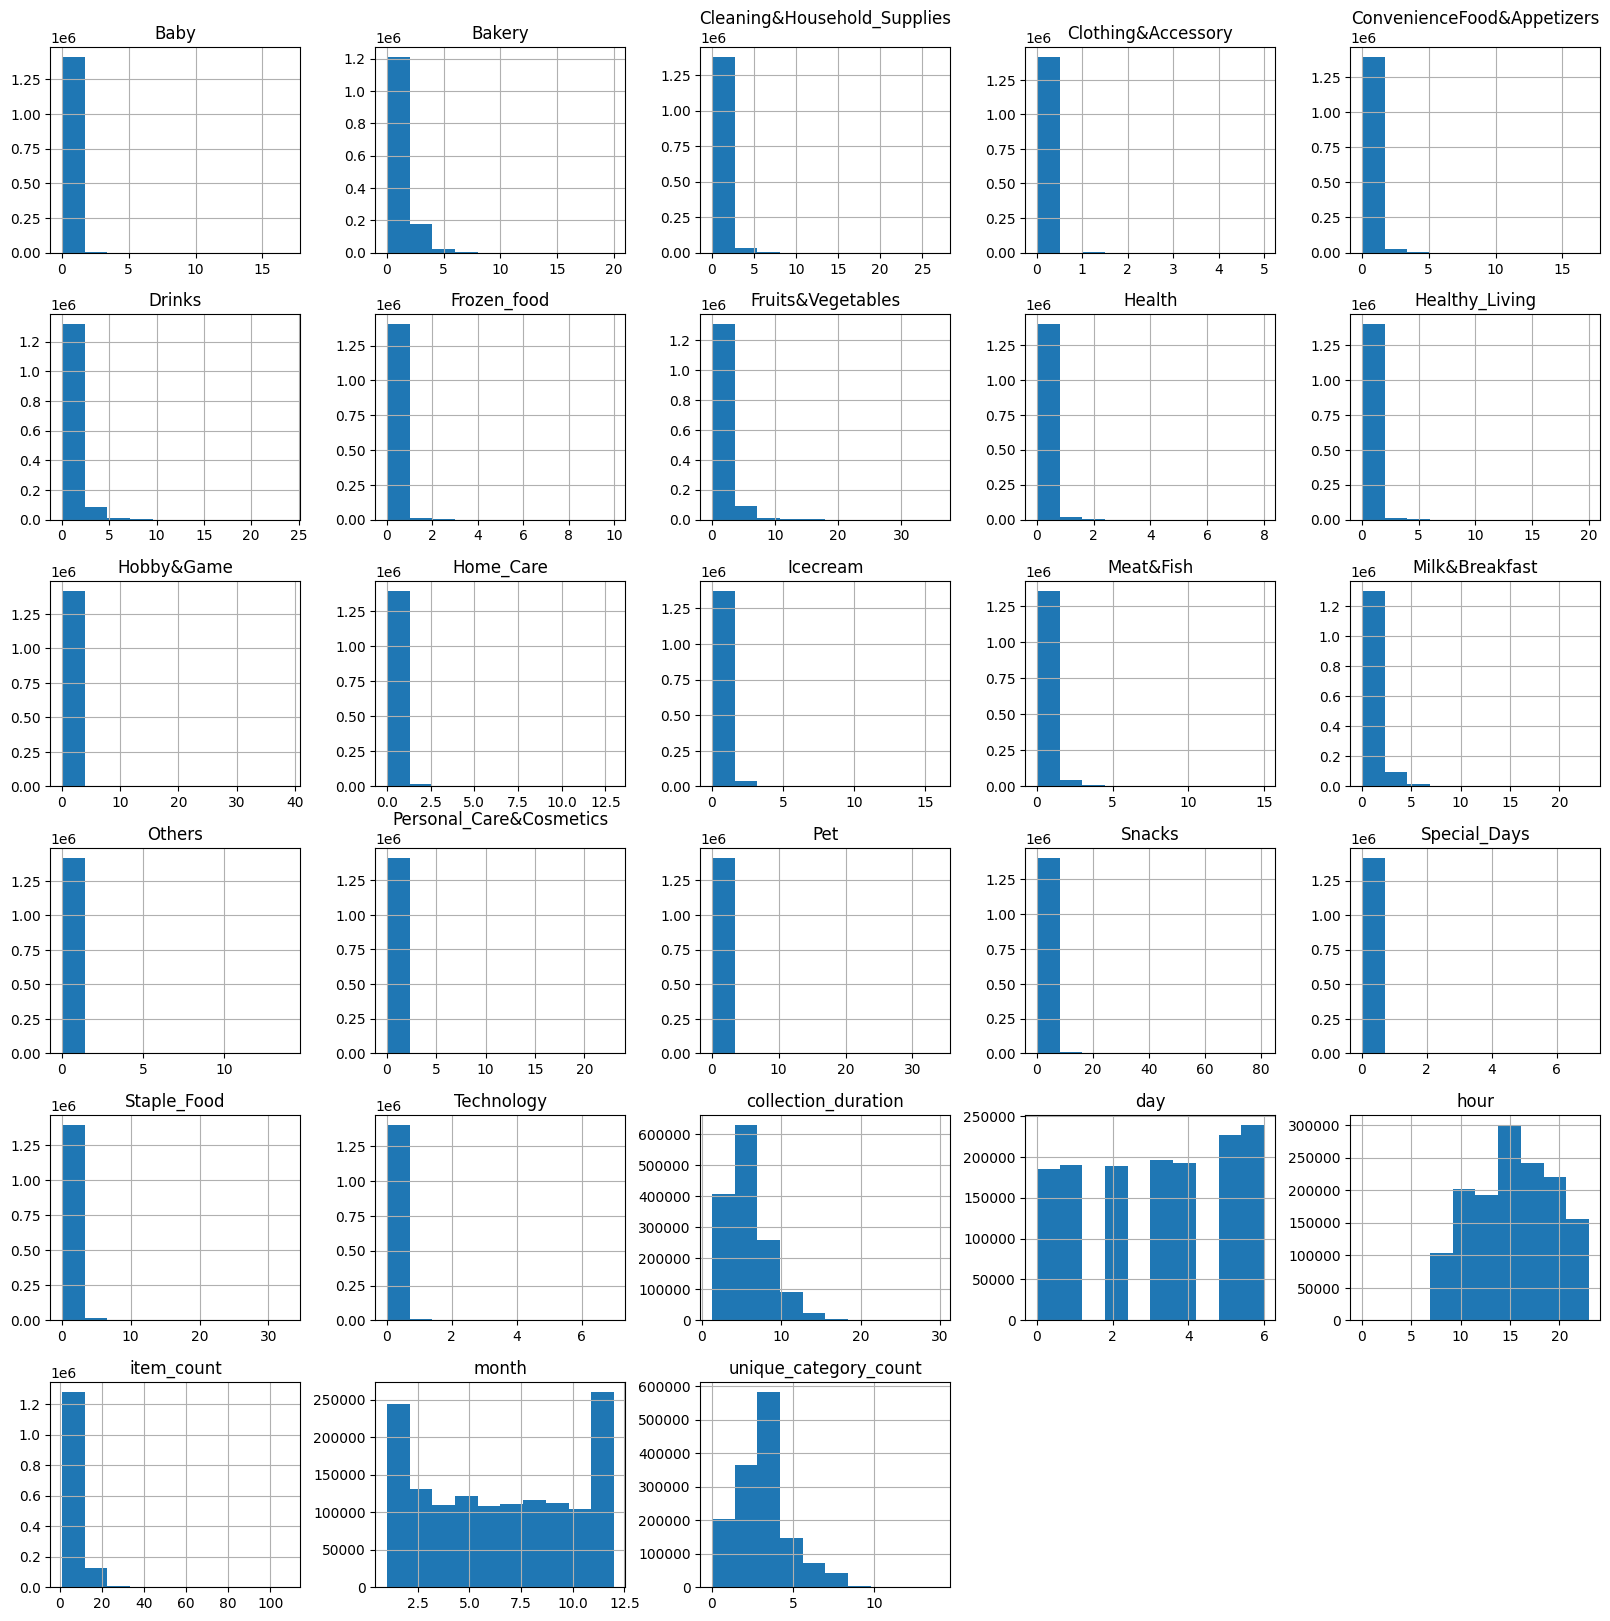

In [13]:
df[cols].hist(figsize=(20,20));

Our main features are hardly right skewed so we will use log transformation to make them more normal.And do univariate outlier detection.

In [14]:
# nplog transformation function as parameters df and column name
def nplog_function(df, column_name):
    df.loc[:, column_name] = np.log1p(df[column_name])
    df[column_name].hist(figsize=(10,5))

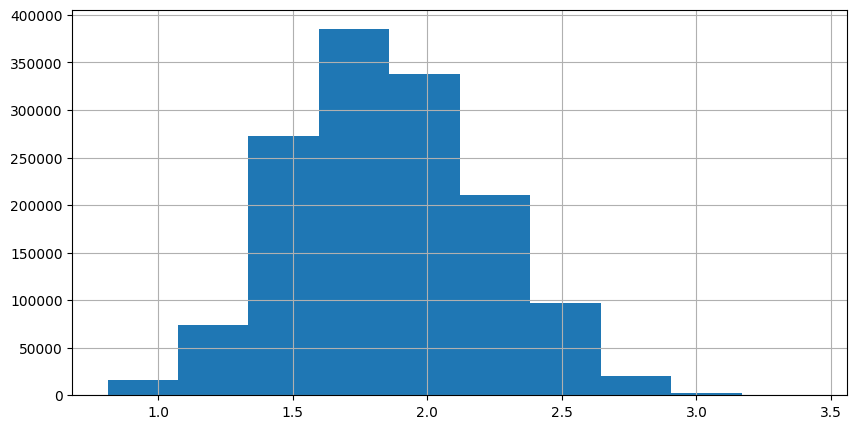

In [15]:
nplog_function(df, 'collection_duration')

/var/folders/6l/ywk92fbn0kj4z5tq_ngb9ttw0000gn/T/ipykernel_1878/3802964814.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.09104245 2.89037176 2.89037176 ... 2.89037176 2.89037176 2.89037176]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name] = np.log1p(df[column_name])


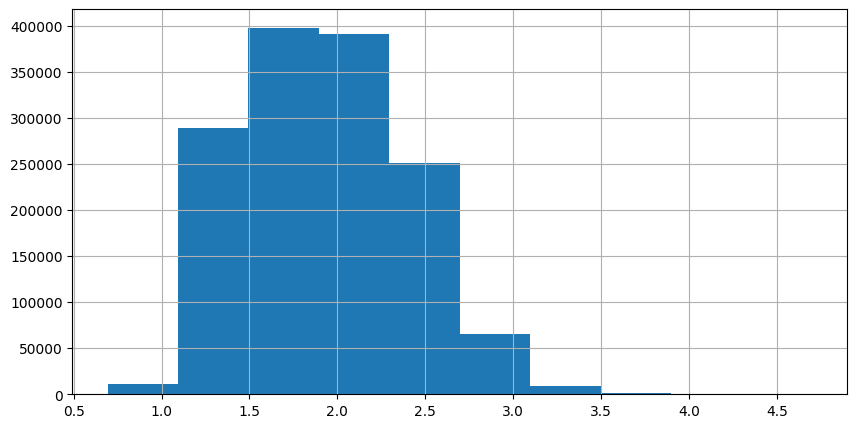

In [16]:
nplog_function(df, 'item_count')

In [17]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,Snacks,Baby,Icecream,...,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count,month,day,hour,is_holiday
0,231986020,66538886,2.640065,3.091042,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,0,0,...,0,7,0,0,0,5,1,0,16,0
1,226345108,64279854,2.910537,2.890372,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,0,...,0,3,0,0,0,4,1,4,17,0
2,355151082,113977388,2.276794,2.890372,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,0,0,...,0,1,0,0,0,8,12,5,13,0
3,235698212,68008610,2.704811,2.995732,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",4,0,0,...,0,1,1,0,1,11,2,5,13,0
4,223149961,63047012,1.920225,2.564949,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,0,0,...,0,0,0,0,0,5,1,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,2.690291,2.890372,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,0,0,...,0,2,1,0,0,7,5,6,22,0
1438814,262597520,78757438,2.462434,2.890372,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,0,0,0,5,5,1,9,0
1438815,236659316,68303121,2.284082,2.890372,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,3,2,0,0,8,2,0,15,0
1438816,250406920,73772482,2.677591,2.890372,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,2,0,0,7,3,6,17,0


In [18]:
"""
# This function detects and prints Interquartile Range (IQR) outliers in a pandas DataFrame column.

# Args:
    # df (pd.DataFrame): The DataFrame containing the data.
    # column_name (str): The name of the column to analyze for outliers.

# Returns:
    # tuple(float, float): A tuple containing the lower and upper bound values for outliers.

# Prints:
    # - IQR value
    # - Lower bound value
    # - Upper bound value
    # - Total number of outliers detected
"""
def univariate_out_iqr_print(df, column_name):
    q25, q75 = np.quantile(df[column_name], 0.25), np.quantile(df[column_name], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR:', iqr)
    print('Lower bound value:', lower)
    print('Upper bound value:', upper)

    df_up_out = df[df[column_name] > upper]
    df_low_out = df[df[column_name] < lower]

    total_outliers = df_up_out.shape[0] + df_low_out.shape[0]
    print('Total number of outliers are:', total_outliers)

    return lower, upper


In [19]:
"""
# This function plots a histogram with IQR outliers highlighted and removes outliers from the DataFrame.

    Args:
    # df (pd.DataFrame): The DataFrame containing the data.
    # column_name (str): The name of the column to analyze for outliers.
    # lower (float): The lower bound value for outliers.
    # upper (float): The upper bound value for outliers.

# Returns:
    # pd.DataFrame: The DataFrame with outliers replaced by NaNs and transformed if necessary (e.g., for item_count column).
"""
def univariate_out_iqr_plot(df, column_name, lower, upper):

    df[column_name].hist(figsize=(10,5))
    plt.axvspan(xmin=lower, xmax=df[column_name].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[column_name].max(), alpha=0.2, color='red')
    plt.show()
    
    
    # df_cleaned = df[(df[column_name] >= lower) & (df[column_name] <= upper)]
    df.loc[(df[column_name] < lower) | (df[column_name] > upper), column_name] = np.nan
    if column_name == 'item_count':
        df.loc[~df[column_name].isna(), column_name] = round(np.expm1(df.loc[~df[column_name].isna(), column_name]))
    else:
        df.loc[~df[column_name].isna(), column_name] = np.expm1(df.loc[~df[column_name].isna(), column_name])
    return df

In [20]:
lower, upper = univariate_out_iqr_print(df, 'collection_duration')

IQR: 0.5069905863002475
Lower bound value: 0.8305414615021527
Upper bound value: 2.8585038067031427
Total number of outliers are: 3552


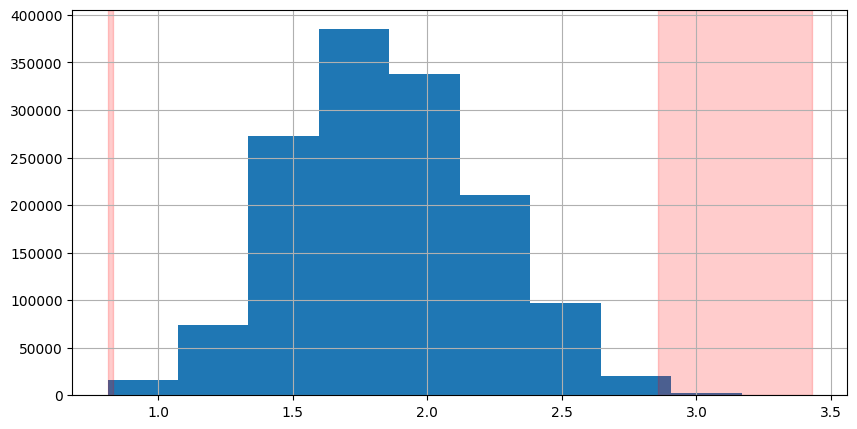

In [21]:
df = univariate_out_iqr_plot(df, 'collection_duration', lower, upper)

In [22]:
lower, upper = univariate_out_iqr_print(df, 'item_count')

IQR: 0.5877866649021193
Lower bound value: 0.7277579150809214
Upper bound value: 3.0789045746893984
Total number of outliers are: 24225


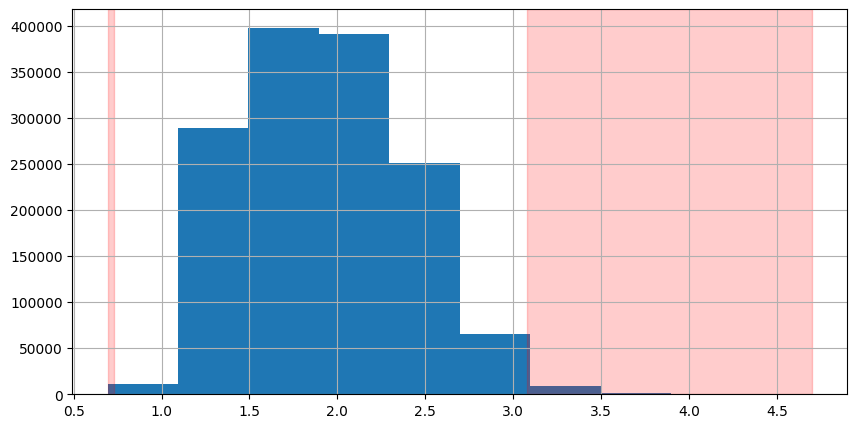

In [23]:
df = univariate_out_iqr_plot(df, 'item_count', lower, upper)

In [24]:
 # Drop rows(outliers) which i have converted to nan
df.dropna(inplace=True)
df

/var/folders/6l/ywk92fbn0kj4z5tq_ngb9ttw0000gn/T/ipykernel_1878/1082701969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,Snacks,Baby,Icecream,...,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count,month,day,hour,is_holiday
2,355151082,113977388,8.745382,17.0,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,0,0,...,0,1,0,0,0,8,12,5,13,0
3,235698212,68008610,13.951483,19.0,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",4,0,0,...,0,1,1,0,1,11,2,5,13,0
4,223149961,63047012,5.822497,12.0,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,0,0,...,0,0,0,0,0,5,1,2,10,0
6,278943542,85253128,4.966667,18.0,False,"Gazlı İçecek,Yeşillik,Sakız & Şekerleme,Bahara...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,0,...,0,1,0,0,0,7,6,4,10,0
7,232291169,66646133,6.268673,15.0,False,"Kuruyemiş,Sebze,Çöp Poşeti,Sos,Kağıt Ürünleri,...","GRAM,GRAM,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,...",1,0,0,...,0,2,6,0,0,8,1,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,13.735969,17.0,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,0,0,...,0,2,1,0,0,7,5,6,22,0
1438814,262597520,78757438,10.733333,17.0,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,0,0,0,5,5,1,9,0
1438815,236659316,68303121,8.816667,17.0,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,3,2,0,0,8,2,0,15,0
1438816,250406920,73772482,13.550000,17.0,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,0,...,0,0,2,0,0,7,3,6,17,0


In [25]:
interested_columns = ['Baby', 'Bakery', 'Cleaning&Household_Supplies', 'Clothing&Accessory',
                      'ConvenienceFood&Appetizers', 'Drinks', 'Frozen_food',
                      'Fruits&Vegetables', 'Health', 'Healthy_Living', 'Hobby&Game',
                      'Home_Care', 'Icecream', 'Meat&Fish', 'Milk&Breakfast', 'Others',
                      'Personal_Care&Cosmetics', 'Pet', 'Snacks', 'Special_Days',
                      'Staple_Food', 'Technology', 'day', 'hour',
                      'item_count', 'month','unique_category_count']


In [26]:
"""
# This function removes outliers from a DataFrame (`data`) based on the Interquartile Range (IQR) method.

# Args:
#    data (pd.DataFrame): The input DataFrame containing the data.
#    group (list): A list of column names in `data` to be used for grouping. Outlier removal is done
#                  within each unique combination of group values.
#    column (str): The name of the column containing numerical data where outliers will be removed.

# Returns:
#    pd.DataFrame: A new DataFrame with outliers removed based on the IQR method within each group.
"""

def remove_outliers_iqr(data, group, column):
  # Group data by x and calculate IQR and outliers
  groups = data.groupby(group, observed=False)
  filtered_data = []
  
  for _, group_data in groups:
    Q1 = group_data[column].quantile(0.25)
    Q3 = group_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data within the bounds
    filtered_group_data = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
    filtered_data.append(filtered_group_data)

  #Print the number of rows removed

  print("Number of rows removed:", len(data) - pd.concat(filtered_data).shape[0])

  return pd.concat(filtered_data)

# # Usage
df = remove_outliers_iqr(df, interested_columns, 'collection_duration')


Number of rows removed: 12137


In [27]:
# Randomize df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### Null and Duplicate Values

In [28]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

# Check if there are any duplicates
num_duplicates = df.duplicated(subset=['order_id', 'package_id']).sum()
print("Number of duplicate rows:", num_duplicates)

Number of null values in each column:
order_id                       0
package_id                     0
collection_duration            0
item_count                     0
is_vip                         0
category_names                 0
units                          0
Snacks                         0
Baby                           0
Icecream                       0
Frozen_food                    0
Meat&Fish                      0
Home_Care                      0
Pet                            0
Bakery                         0
Clothing&Accessory             0
ConvenienceFood&Appetizers     0
Hobby&Game                     0
Drinks                         0
Personal_Care&Cosmetics        0
Fruits&Vegetables              0
Health                         0
Healthy_Living                 0
Milk&Breakfast                 0
Technology                     0
Staple_Food                    0
Cleaning&Household_Supplies    0
Special_Days                   0
Others                         0
uniqu

In [29]:
# Check if there are any duplicates keep first for order & package id
df.drop_duplicates(subset=['order_id', 'package_id'], keep='first', inplace=True)
# Drop null values
df.dropna(inplace=True)
# Drop the columns that are not needed
df.drop(columns=['package_id','order_id','units'], inplace=True)

In [30]:
df

,collection_duration,item_count,is_vip,category_names,Snacks,Baby,Icecream,Frozen_food,Meat&Fish,Home_Care,...,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count,month,day,hour,is_holiday
0,4.766667,6.0,False,"Duş & Banyo,Duş & Banyo,Saç Bakım,Saç Bakım,Pa...",0,0,0,0,0,0,...,0,0,0,0,0,1,7,3,15,0
1,3.731673,7.0,False,"Gofret,Maden Suyu,Peynir,Kuruyemiş,Gofret,Yumurta",3,0,0,0,0,0,...,0,0,0,0,0,3,3,1,11,0
2,3.675279,3.0,False,"Bakliyat,Gevrekler,Süt",0,0,0,0,0,0,...,0,1,0,0,0,2,12,5,14,0
3,5.766667,2.0,False,Beyaz Et,0,0,0,0,1,0,...,0,0,0,0,0,1,5,0,11,1
4,8.183333,5.0,False,"Makarna,Sebze,Konserve,Makarna",0,0,0,0,0,0,...,0,3,0,0,0,2,10,2,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379408,5.850000,8.0,False,"Bakliyat,Peynir,Bakliyat,Bakliyat,Peynir,Süt,Süt",0,0,0,0,0,0,...,0,3,0,0,0,2,3,6,16,0
1379409,8.683333,7.0,False,"Sebze,Yumurta,Makarna,Makarna,Meyve,Peynir",0,0,0,0,0,0,...,0,2,0,0,0,3,3,1,19,0
1379410,5.030277,4.0,False,"Çikolata & Kahvaltı,Yumurta,Beyaz Et",0,0,0,0,1,0,...,0,0,0,0,0,2,3,6,14,0
1379411,3.716667,7.0,False,"Dondurulmuş Gıda,Soğuk Kahve,Dondurulmuş Gıda,...",0,0,1,0,1,0,...,0,0,0,0,0,4,9,4,16,0


# Data Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

## Boxplot Analysis

In [32]:
#How many rows each "day" column has in the data
print(df['day'].value_counts())

#Plot the mean of the "toplama_süresi" column for each day of the week instead of 0123456 Used Day names
df['day'] = df['day'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day'] = pd.Categorical(df['day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

day
6    232908
5    219974
3    190631
4    186654
1    184759
2    184018
0    180469
Name: count, dtype: int64


In [33]:
'''
# This function creates a boxplot to visualize the distribution of a numerical variable (y)
# across different categories (x) in a DataFrame (data).

# Args:
#     data (pd.DataFrame): The DataFrame containing the data to be visualized.
#     x (str): The name of the column in `data` representing the categorical variable.
#     y (str): The name of the column in `data` containing the numerical variable to be plotted.
#     xlabel (str): The label for the x-axis (categorical variable).
#     tight (bool, optional): A flag to control the layout of the plot. If True, rotates x-axis labels
#                             for better readability and applies tight layout. Defaults to False.

# Returns:
#     Creates a boxplot visualization.
'''

def plot_boxplot( x, y, data, xlabel, tight=False):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, hue=x, showfliers=False)
    plt.xlabel(xlabel)
    plt.ylabel("Collection Time (min)")
    plt.title("Boxplot of Collection Duration by " + xlabel)
    if(tight==True):
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()
    print(df.groupby(x, observed=False)[y].mean())

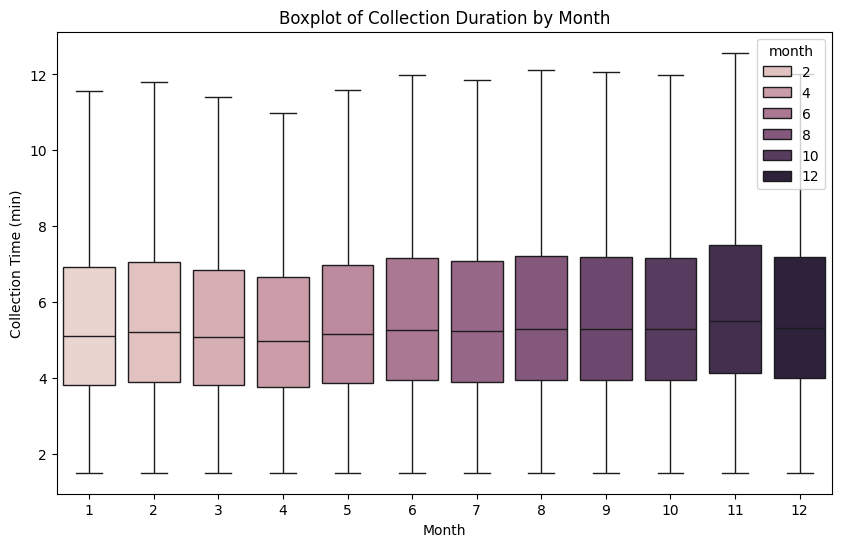

month
1     5.630669
2     5.734071
3     5.596640
4     5.467925
5     5.683770
6     5.814393
7     5.762262
8     5.830517
9     5.835167
10    5.820668
11    6.046866
12    5.862164
Name: collection_duration, dtype: float64


In [34]:
plot_boxplot('month', 'collection_duration', df, 'Month')

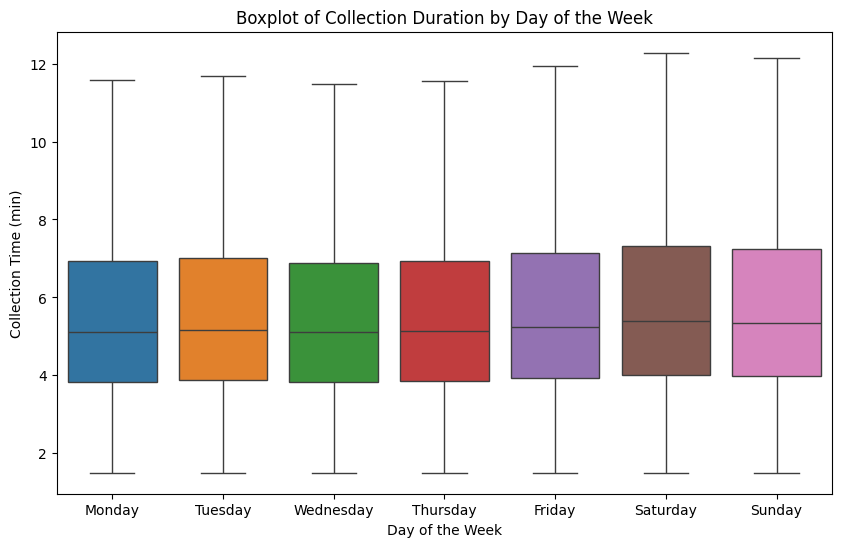

day
Monday       5.651547
Tuesday      5.704386
Wednesday    5.629460
Thursday     5.658336
Friday       5.793680
Saturday     5.927952
Sunday       5.873135
Name: collection_duration, dtype: float64


In [35]:
plot_boxplot('day', 'collection_duration', df, 'Day of the Week')

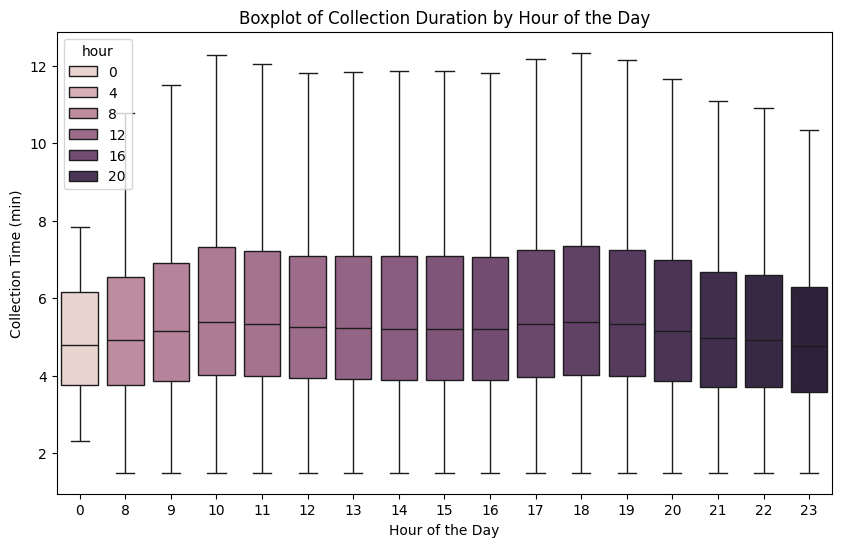

hour
0     5.163187
8     5.418547
9     5.671365
10    5.928798
11    5.859960
12    5.775678
13    5.771814
14    5.760942
15    5.759709
16    5.757502
17    5.866371
18    5.930641
19    5.872044
20    5.685738
21    5.456264
22    5.411069
23    5.176505
Name: collection_duration, dtype: float64


In [36]:
plot_boxplot('hour', 'collection_duration', df, 'Hour of the Day')

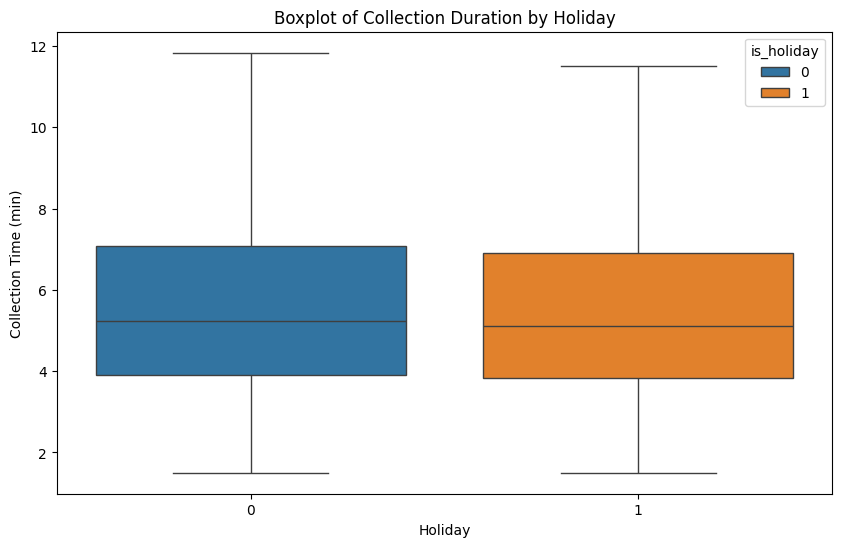

is_holiday
0    5.761010
1    5.633202
Name: collection_duration, dtype: float64


In [37]:
plot_boxplot('is_holiday', 'collection_duration', df, 'Holiday')

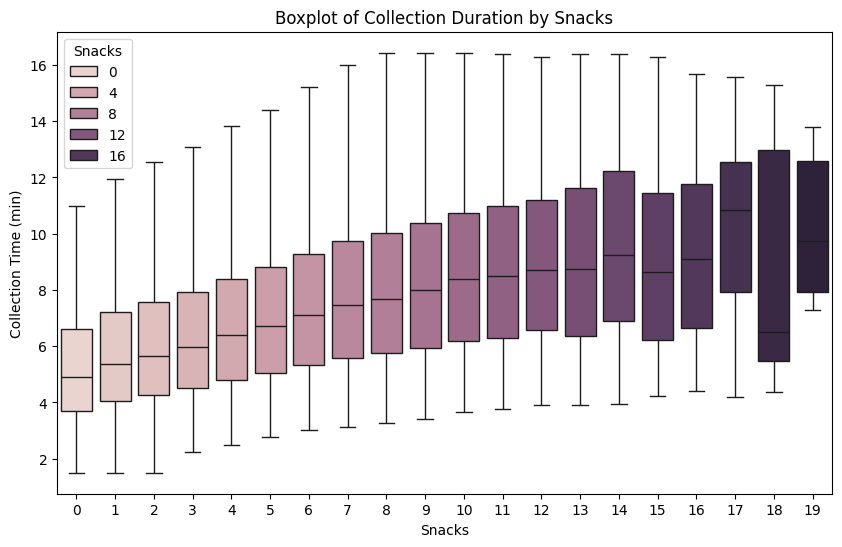

Snacks
0      5.401266
1      5.877769
2      6.186098
3      6.494963
4      6.860486
5      7.176985
6      7.522739
7      7.845836
8      8.074796
9      8.344146
10     8.645128
11     8.764147
12     8.970173
13     9.089585
14     9.623889
15     8.974824
16     9.275095
17    10.341117
18     8.678595
19    10.245220
Name: collection_duration, dtype: float64


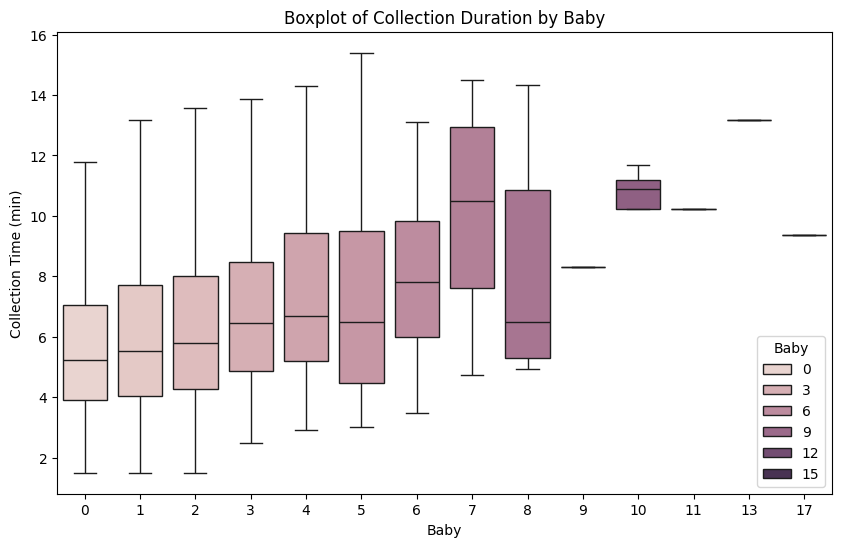

Baby
0      5.745054
1      6.107175
2      6.369949
3      6.880535
4      7.377326
5      7.111822
6      7.839507
7     10.162178
8      8.109212
9      8.302253
10    10.525516
11    10.219019
13    13.189461
17     9.353685
Name: collection_duration, dtype: float64


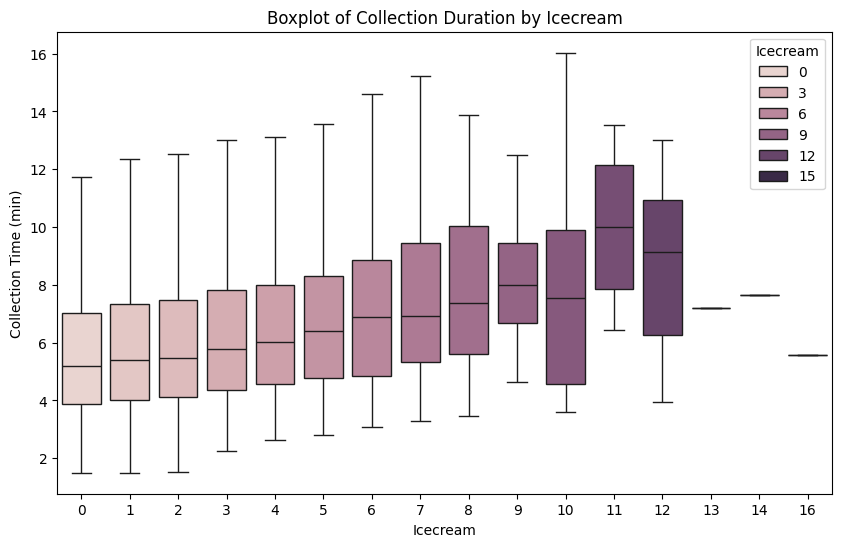

Icecream
0     5.729280
1     5.934672
2     6.061836
3     6.358114
4     6.554256
5     6.862651
6     7.141896
7     7.566386
8     7.728753
9     8.385219
10    7.763177
11    9.996184
12    8.665891
13    7.183333
14    7.633333
16    5.566667
Name: collection_duration, dtype: float64


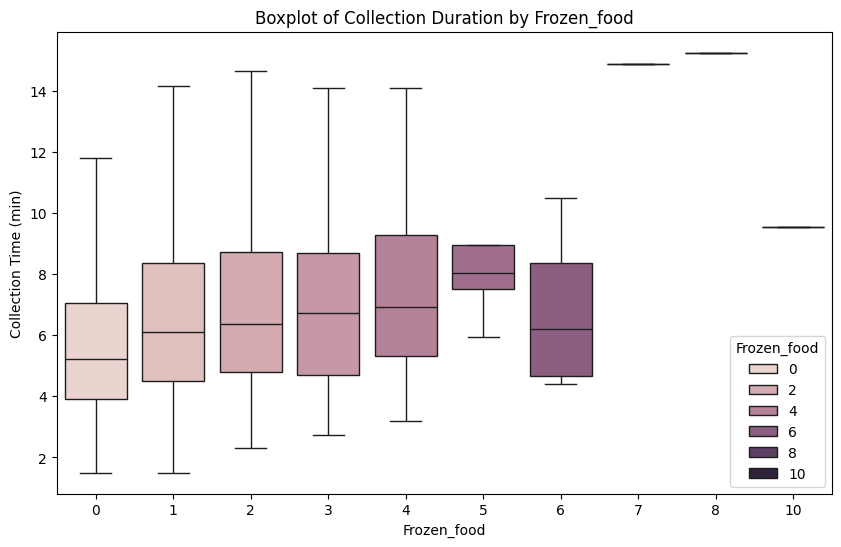

Frozen_food
0      5.750426
1      6.648840
2      6.914307
3      7.109745
4      7.792241
5      8.410746
6      6.817259
7     14.866667
8     15.250000
10     9.533333
Name: collection_duration, dtype: float64


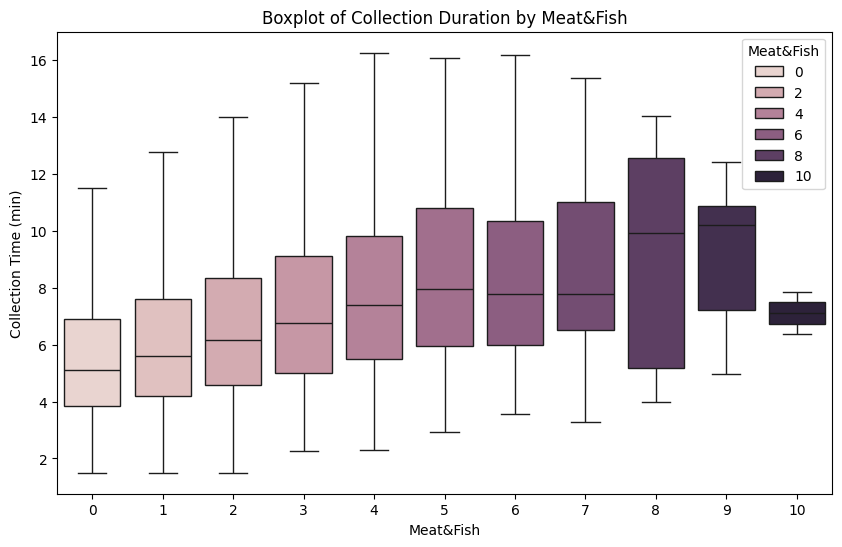

Meat&Fish
0     5.627205
1     6.150535
2     6.701847
3     7.272768
4     7.808869
5     8.409932
6     8.443204
7     8.581572
8     9.402581
9     9.118515
10    7.112330
Name: collection_duration, dtype: float64


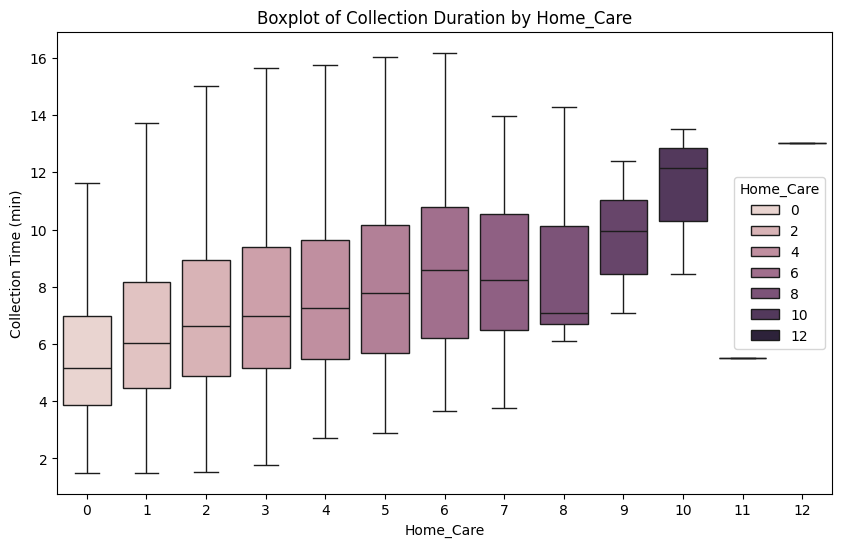

Home_Care
0      5.685256
1      6.538616
2      7.103733
3      7.453699
4      7.753833
5      8.054412
6      8.759741
7      8.460849
8      8.867422
9      9.772216
10    11.378171
11     5.505780
12    13.016326
Name: collection_duration, dtype: float64


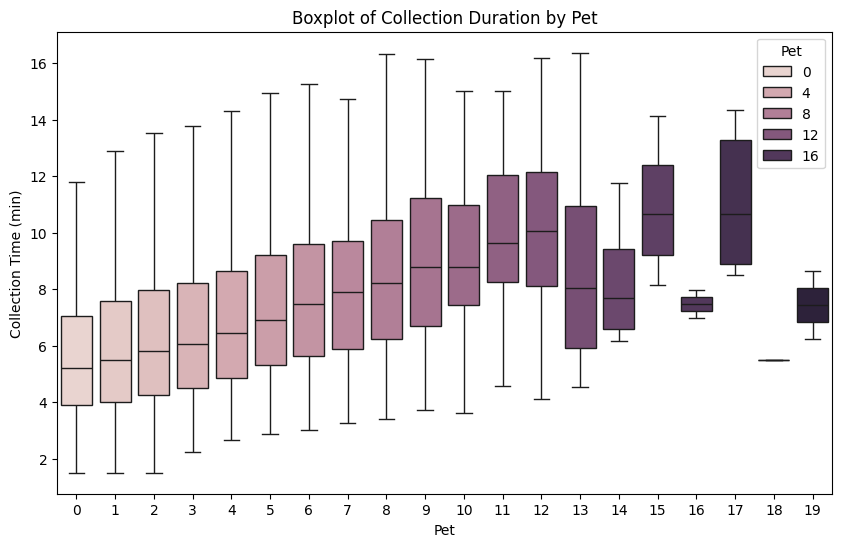

Pet
0      5.740073
1      6.043882
2      6.361752
3      6.628267
4      6.988067
5      7.392056
6      7.797743
7      7.999012
8      8.477457
9      9.088523
10     9.019444
11     9.770851
12    10.124561
13     8.658683
14     8.321007
15    10.901900
16     7.462439
17    11.134258
18     5.500000
19     7.441667
Name: collection_duration, dtype: float64


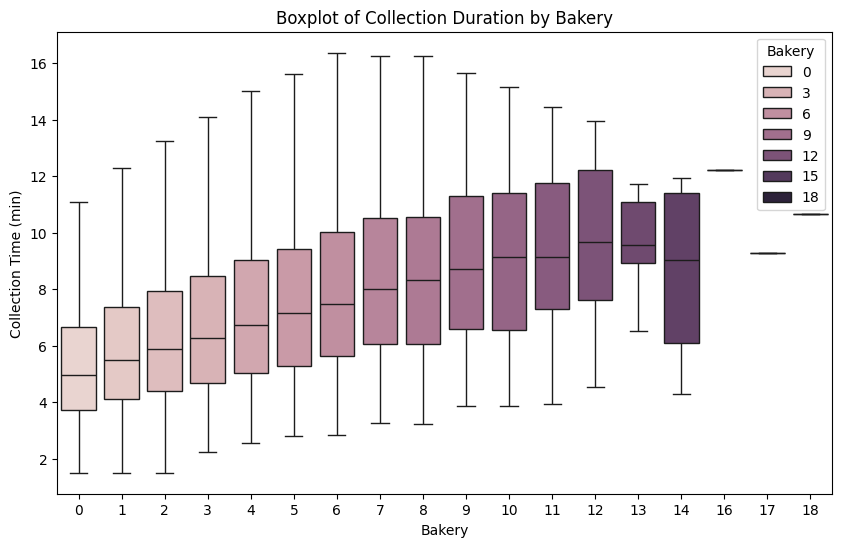

Bakery
0      5.450537
1      6.009179
2      6.427791
3      6.812228
4      7.217072
5      7.570847
6      7.970845
7      8.403090
8      8.504574
9      8.960711
10     8.901152
11     9.428829
12     9.682882
13     9.610419
14     8.538030
16    12.206287
17     9.284055
18    10.645826
Name: collection_duration, dtype: float64


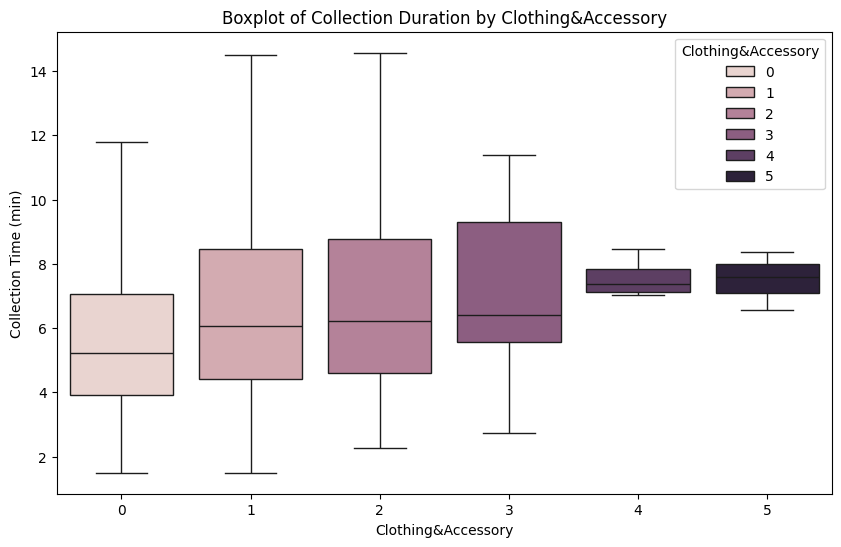

Clothing&Accessory
0    5.755867
1    6.586320
2    6.782143
3    7.099680
4    7.564673
5    7.520592
Name: collection_duration, dtype: float64


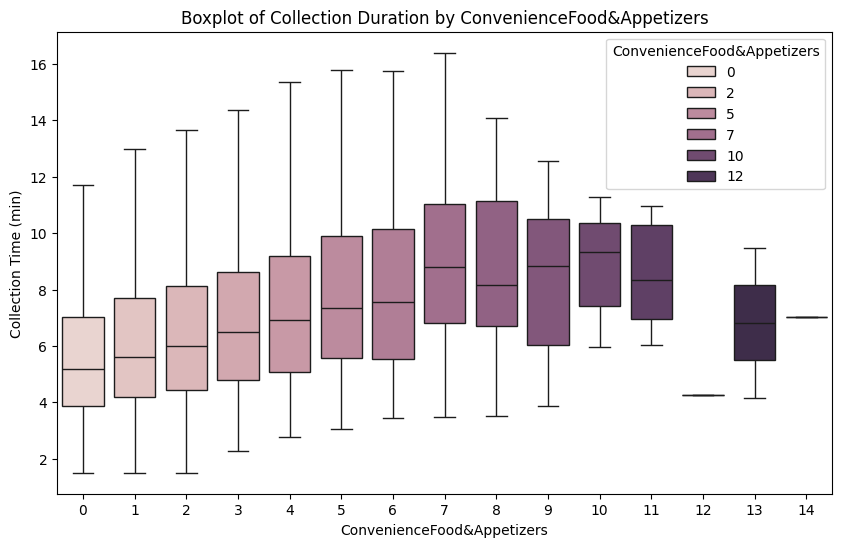

ConvenienceFood&Appetizers
0     5.711617
1     6.197720
2     6.523157
3     6.998917
4     7.327549
5     7.795753
6     8.022100
7     8.914584
8     8.608184
9     8.455663
10    8.900708
11    8.509370
12    4.250000
13    6.816957
14    7.033333
Name: collection_duration, dtype: float64


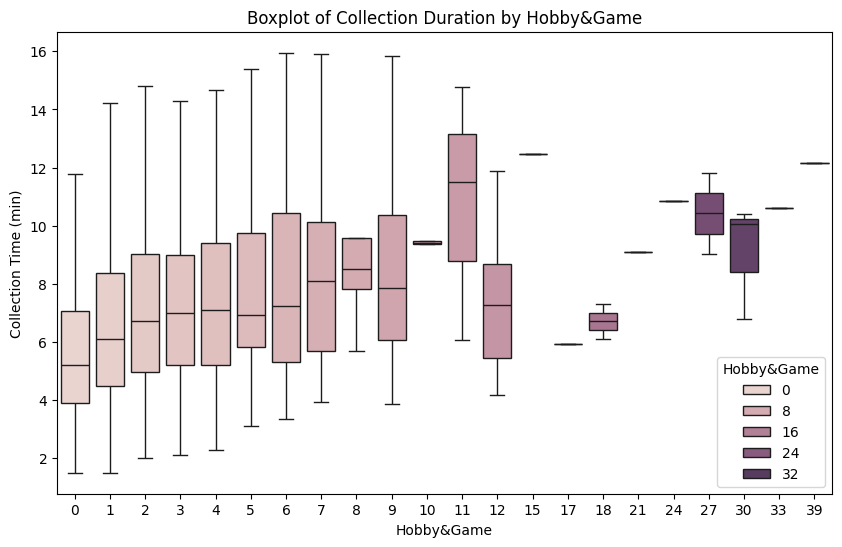

Hobby&Game
0      5.748047
1      6.627785
2      7.161626
3      7.274081
4      7.513050
5      7.803572
6      7.737833
7      8.462586
8      8.885414
9      8.521352
10     9.494336
11    10.777657
12     7.370343
15    12.481514
17     5.929366
18     6.704029
21     9.088710
24    10.855698
27    10.424694
30     9.068809
33    10.604511
39    12.141700
Name: collection_duration, dtype: float64


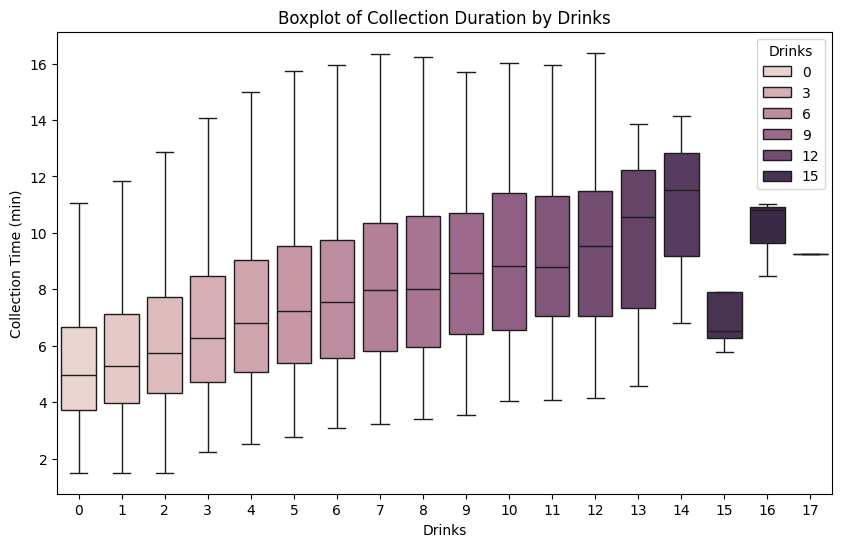

Drinks
0      5.439097
1      5.807611
2      6.286014
3      6.824662
4      7.293172
5      7.637718
6      7.872166
7      8.276056
8      8.413314
9      8.737245
10     9.136200
11     9.168722
12     9.545102
13     9.896828
14    10.819613
15     7.666667
16    10.103560
17     9.250000
Name: collection_duration, dtype: float64


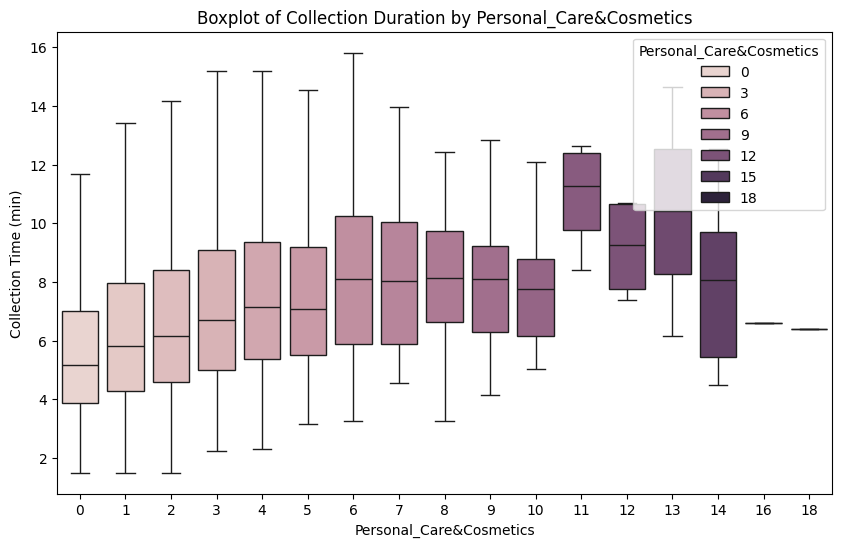

Personal_Care&Cosmetics
0      5.706214
1      6.355888
2      6.718944
3      7.236259
4      7.545539
5      7.507543
6      8.261678
7      8.063149
8      8.337098
9      8.033499
10     8.280627
11    10.898452
12     9.139091
13    10.401261
14     8.040203
16     6.583323
18     6.410724
Name: collection_duration, dtype: float64


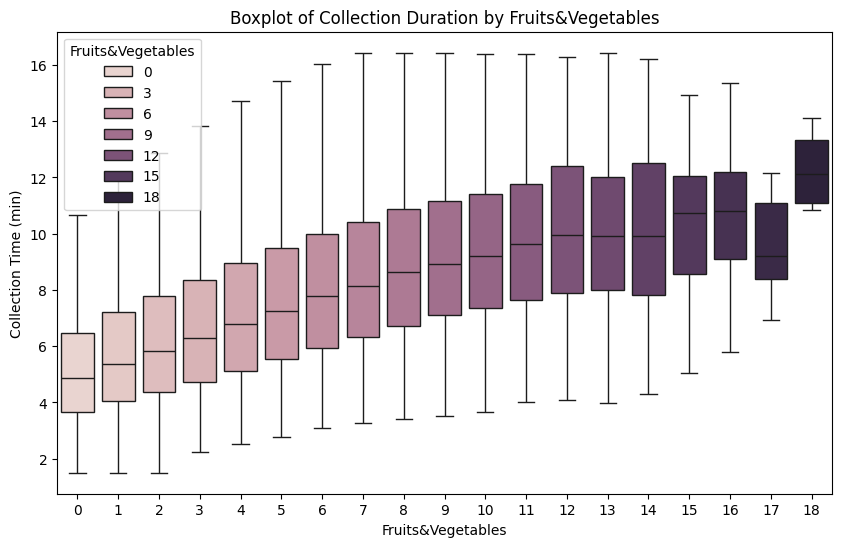

Fruits&Vegetables
0      5.321389
1      5.877480
2      6.337776
3      6.792297
4      7.257783
5      7.698657
6      8.123458
7      8.496622
8      8.896960
9      9.197998
10     9.430462
11     9.758944
12    10.117614
13    10.079913
14    10.087035
15    10.396666
16    10.682886
17     9.548533
18    12.299888
Name: collection_duration, dtype: float64


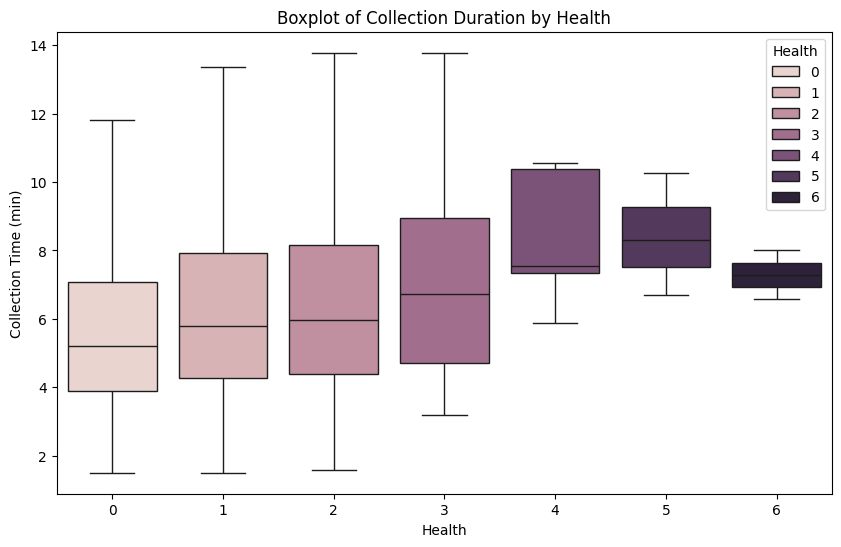

Health
0    5.750793
1    6.317991
2    6.481171
3    7.121205
4    8.983242
5    8.424265
6    7.291667
Name: collection_duration, dtype: float64


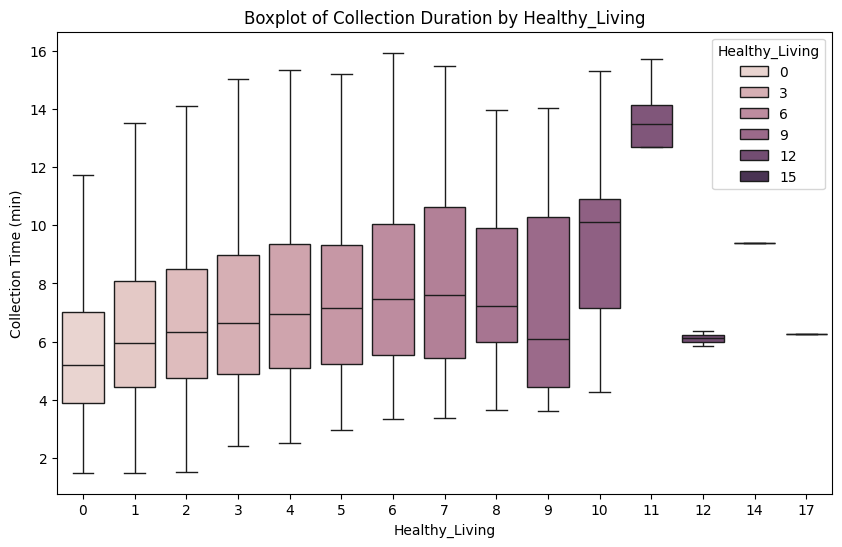

Healthy_Living
0      5.731328
1      6.484014
2      6.865354
3      7.173801
4      7.452441
5      7.579156
6      8.000405
7      8.100323
8      8.032650
9      7.435737
10     9.424579
11    12.736160
12     6.114788
14     9.383333
17     6.266667
Name: collection_duration, dtype: float64


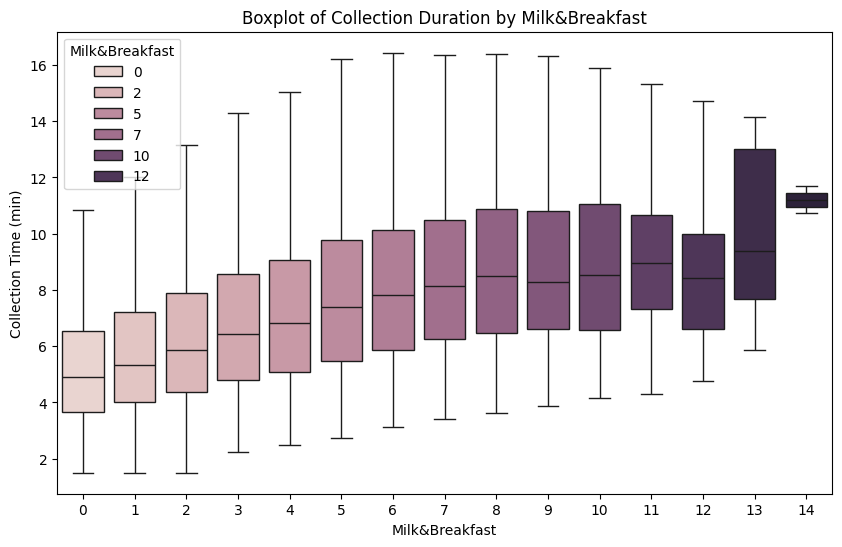

Milk&Breakfast
0      5.360306
1      5.863139
2      6.399801
3      6.925039
4      7.329751
5      7.829367
6      8.161252
7      8.490049
8      8.784721
9      8.845597
10     8.966815
11     9.153269
12     8.681703
13    10.010944
14    11.202676
Name: collection_duration, dtype: float64


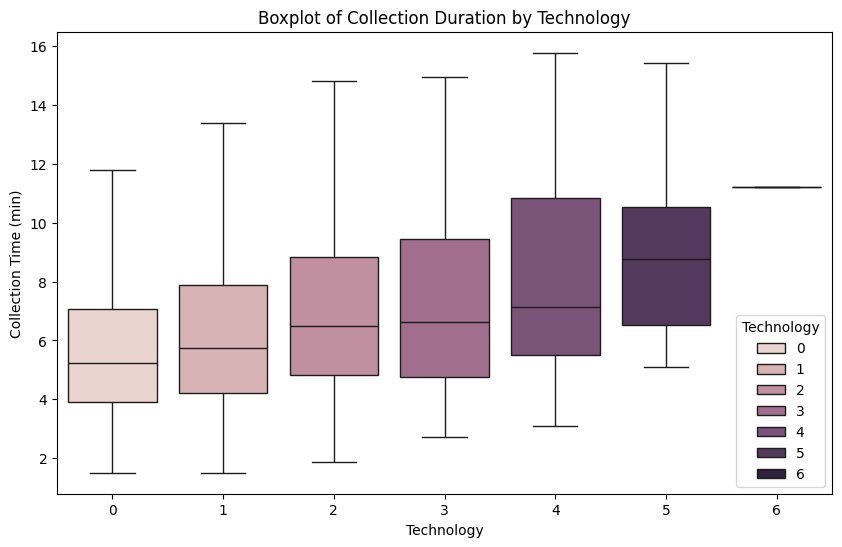

Technology
0     5.751472
1     6.291582
2     7.025213
3     7.287576
4     8.029246
5     8.842383
6    11.200000
Name: collection_duration, dtype: float64


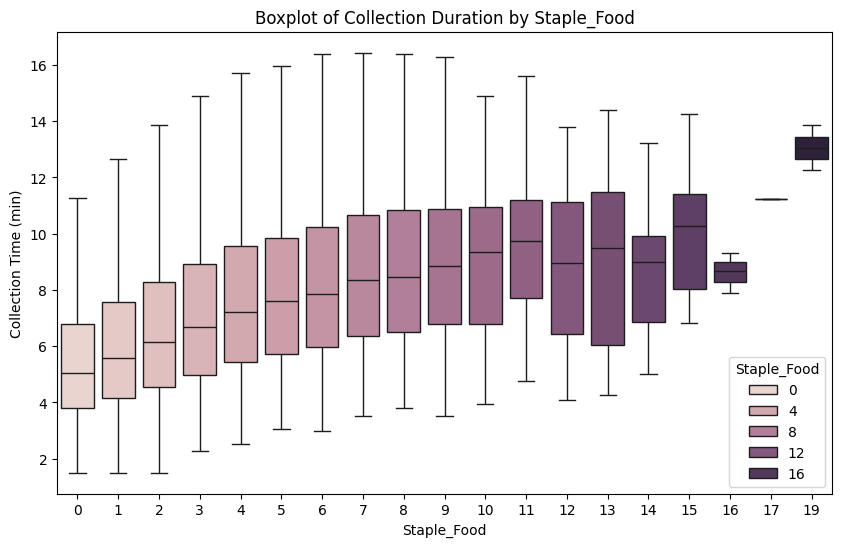

Staple_Food
0      5.545919
1      6.122359
2      6.659276
3      7.161335
4      7.650717
5      7.964246
6      8.226449
7      8.626805
8      8.767854
9      8.972533
10     8.994612
11     9.362754
12     8.814895
13     9.148321
14     8.775866
15    10.111832
16     8.625882
17    11.211425
19    13.050321
Name: collection_duration, dtype: float64


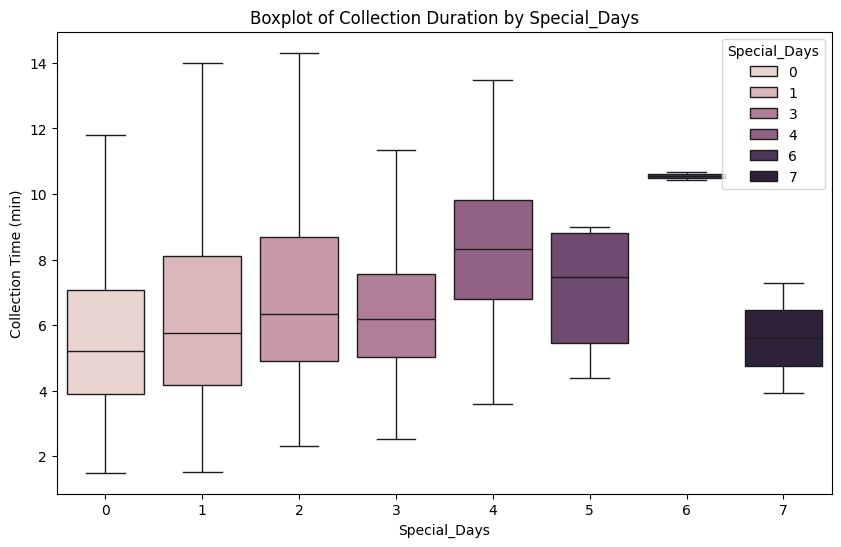

Special_Days
0     5.756323
1     6.365308
2     7.016309
3     6.447926
4     8.230201
5     7.785830
6    10.541667
7     5.607574
Name: collection_duration, dtype: float64


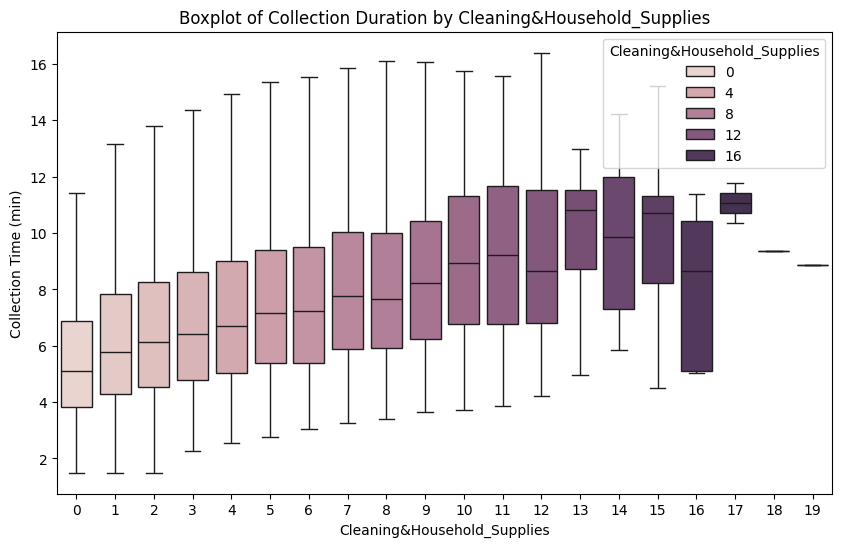

Cleaning&Household_Supplies
0      5.601356
1      6.320826
2      6.644881
3      6.923704
4      7.212066
5      7.593462
6      7.654166
7      8.081205
8      8.108788
9      8.488353
10     9.102677
11     9.270234
12     9.226874
13    10.075645
14     9.604834
15     9.932383
16     8.113716
17    11.061881
18     9.375256
19     8.850115
Name: collection_duration, dtype: float64


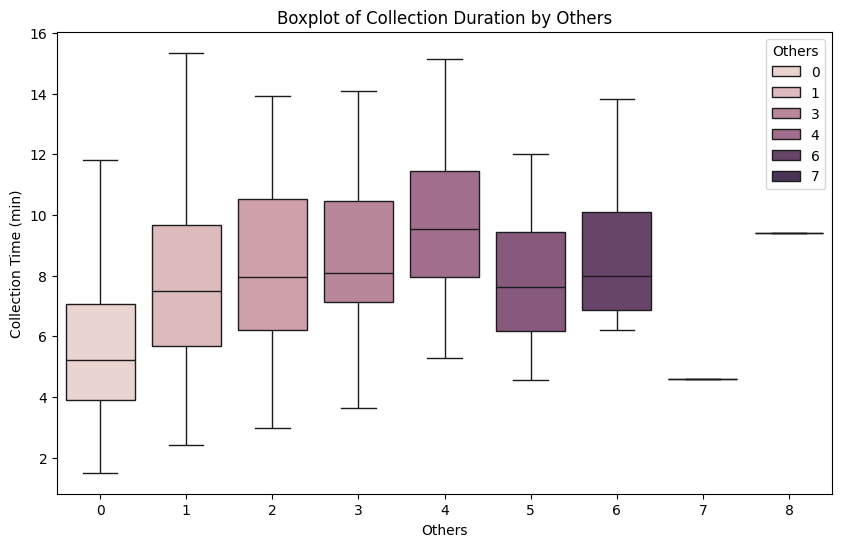

Others
0    5.755689
1    7.774355
2    8.274734
3    8.665244
4    9.513404
5    7.908900
6    8.996034
7    4.586540
8    9.407363
Name: collection_duration, dtype: float64


In [38]:
plot_boxplot('Snacks', 'collection_duration', df, 'Snacks')
plot_boxplot('Baby', 'collection_duration', df, 'Baby')
plot_boxplot('Icecream', 'collection_duration', df, 'Icecream')
plot_boxplot('Frozen_food', 'collection_duration', df, 'Frozen_food')
plot_boxplot('Meat&Fish', 'collection_duration', df, 'Meat&Fish')
plot_boxplot('Home_Care', 'collection_duration', df, 'Home_Care')
plot_boxplot('Pet', 'collection_duration', df, 'Pet')
plot_boxplot('Bakery', 'collection_duration', df, 'Bakery')
plot_boxplot('Clothing&Accessory', 'collection_duration', df, 'Clothing&Accessory')
plot_boxplot('ConvenienceFood&Appetizers', 'collection_duration', df, 'ConvenienceFood&Appetizers')
plot_boxplot('Hobby&Game', 'collection_duration', df, 'Hobby&Game')
plot_boxplot('Drinks', 'collection_duration', df, 'Drinks')
plot_boxplot('Personal_Care&Cosmetics', 'collection_duration', df, 'Personal_Care&Cosmetics')
plot_boxplot('Fruits&Vegetables', 'collection_duration', df, 'Fruits&Vegetables')
plot_boxplot('Health', 'collection_duration', df, 'Health')
plot_boxplot('Healthy_Living', 'collection_duration', df, 'Healthy_Living')
plot_boxplot('Milk&Breakfast', 'collection_duration', df, 'Milk&Breakfast')
plot_boxplot('Technology', 'collection_duration', df, 'Technology')
plot_boxplot('Staple_Food', 'collection_duration', df, 'Staple_Food')
plot_boxplot('Special_Days', 'collection_duration', df, 'Special_Days')
plot_boxplot('Cleaning&Household_Supplies', 'collection_duration', df, 'Cleaning&Household_Supplies')
plot_boxplot('Others', 'collection_duration', df, 'Others')

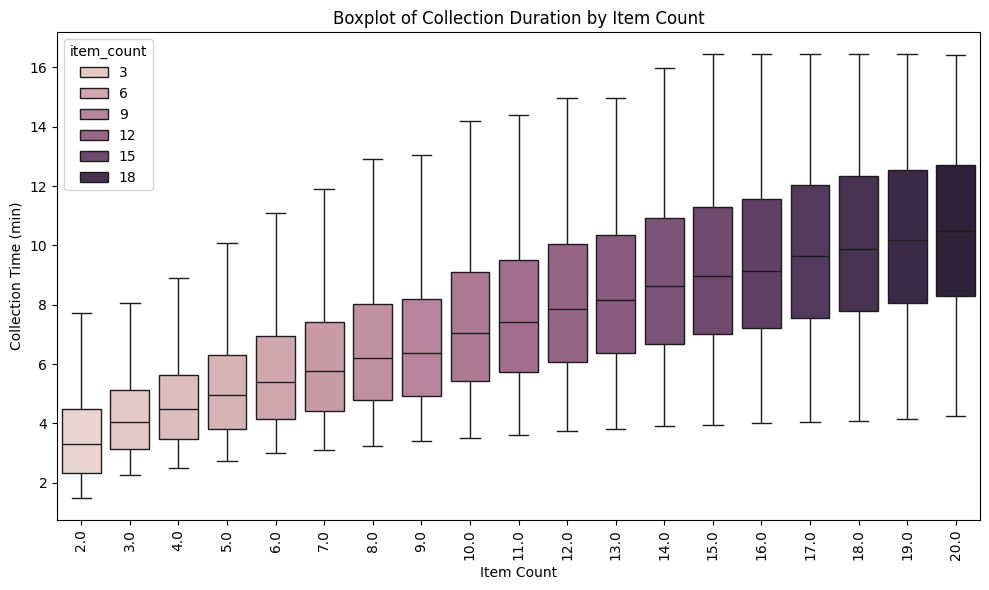

item_count
2.0      3.548573
3.0      4.312785
4.0      4.715263
5.0      5.252230
6.0      5.742710
7.0      6.110191
8.0      6.568757
9.0      6.858849
10.0     7.399537
11.0     7.725727
12.0     8.168321
13.0     8.422817
14.0     8.880280
15.0     9.215083
16.0     9.418439
17.0     9.816530
18.0    10.018664
19.0    10.230001
20.0    10.450061
Name: collection_duration, dtype: float64


In [39]:
plot_boxplot('item_count', 'collection_duration', df, 'Item Count', True)

## Unique Category Analysis

In [40]:
# Initializing an empty set to store unique categories
unique_categories = set()
unique_categories_counts = {}
category_collection_times = {}

'''
# This function processes a single row from a DataFrame and updates dictionaries
# tracking unique category counts and collection times.

# Arguments:
#   row (pandas.Series): A row from a DataFrame containing at least:
#       - 'category_names' (str): Comma-separated string of category names.
#       - 'collection_duration' (float): Collection duration for the item.
#   unique_categories_counts (dict): A dictionary to store counts of unique categories (key: category name, value: count).
#   category_collection_times (dict): A dictionary to store collection times for each category (key: category name, value: list of collection durations).
'''

def process_row(row, unique_categories_counts, category_collection_times):
    if pd.notna(row['category_names']):   
        categories = row['category_names'].split(',')      
        for category in categories:
            category = category.strip()
            unique_categories_counts[category] = unique_categories_counts.get(category, 0) + 1

            if category not in category_collection_times:
                category_collection_times[category] = [row['collection_duration']]
            else:
                category_collection_times[category].append(row['collection_duration'])

In [41]:
# Iterate through each row of the DataFrame
for index, row in df.iterrows():
   process_row(row, unique_categories_counts, category_collection_times)

# Convert the dictionary to a DataFrame
unique_categories_counts_df = pd.DataFrame(list(unique_categories_counts.items()),
                                           columns=['Unique Categories', 'Count'])

# Sort the DataFrame by the count in descending order and give them rankings
unique_categories_counts_df['Rank'] = unique_categories_counts_df['Count'].rank(ascending=False)
unique_categories_counts_df.sort_values(by='Rank', inplace=True)
unique_categories_counts_df = unique_categories_counts_df.drop(columns='Count')

# Calculate the average collection time for each unique category
average_collection_time = {}
for category, times in category_collection_times.items():
    average_collection_time[category] = sum(times) / len(times)


# Add a new column in unique_categories_counts_df to store the average collection time
unique_categories_counts_df['average_collection_time'] = unique_categories_counts_df['Unique Categories'].map(average_collection_time)

In [42]:
unique_categories_counts_df

,Unique Categories,Rank,average_collection_time
13,Sebze,1.0,7.096007
15,Meyve,2.0,7.000891
32,Ekmek,3.0,6.332448
48,Cips,4.0,6.579090
10,Süt,5.0,6.453930
...,...,...,...
215,Baton,220.0,5.530027
216,Isıtma,221.5,5.156865
217,Soğutma,221.5,5.156865
221,Yetiştirme Kiti,223.0,8.144544


In [43]:
unique_categories_counts_df.to_csv('../data/preprocessed/unique_categories_counts.csv', index=False)

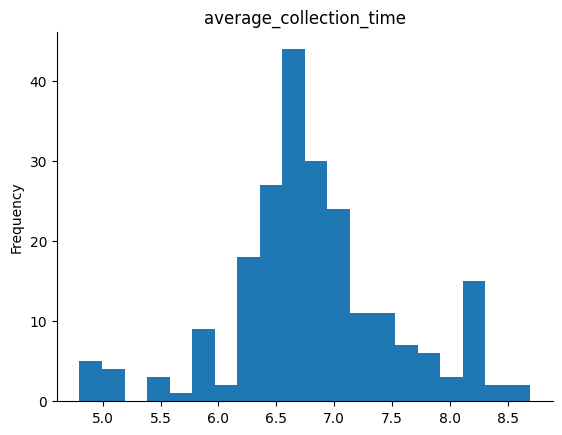

In [44]:
unique_categories_counts_df['average_collection_time'].plot(kind='hist', bins=20, title='average_collection_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
# Can remove else part didn't use it but can be used for further analysis
def plot_barplot(x, y, data, xlabel, tight=False):
    num_parts = 3
    part_size = len(data) // num_parts

    if tight:
        for i in range(num_parts):
            start_index = i * part_size
            end_index = (i + 1) * part_size if i < num_parts - 1 else len(data)
            part_data = data[start_index:end_index]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=x, y=y, data=part_data, hue=x)
            plt.xlabel(xlabel)
            plt.ylabel("Collection Time (min)")
            plt.title(f"Barplot of Collection Duration by {xlabel} (Part {i+1})")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x, y=y, data=data, hue=x)
        plt.xlabel(xlabel)
        plt.ylabel("Collection Time (min)")
        plt.title("Barplot of Collection Duration by " + xlabel)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


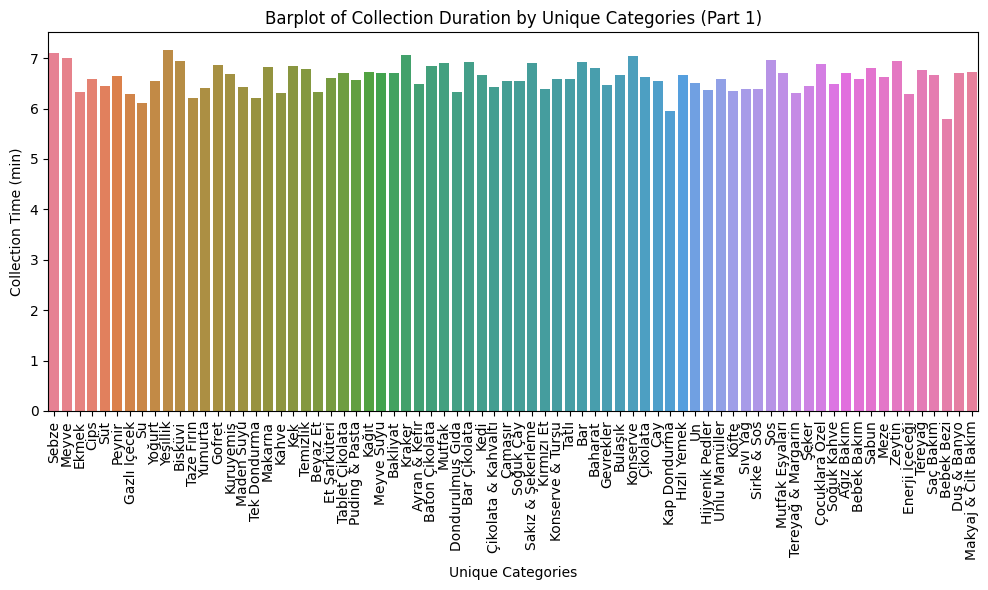

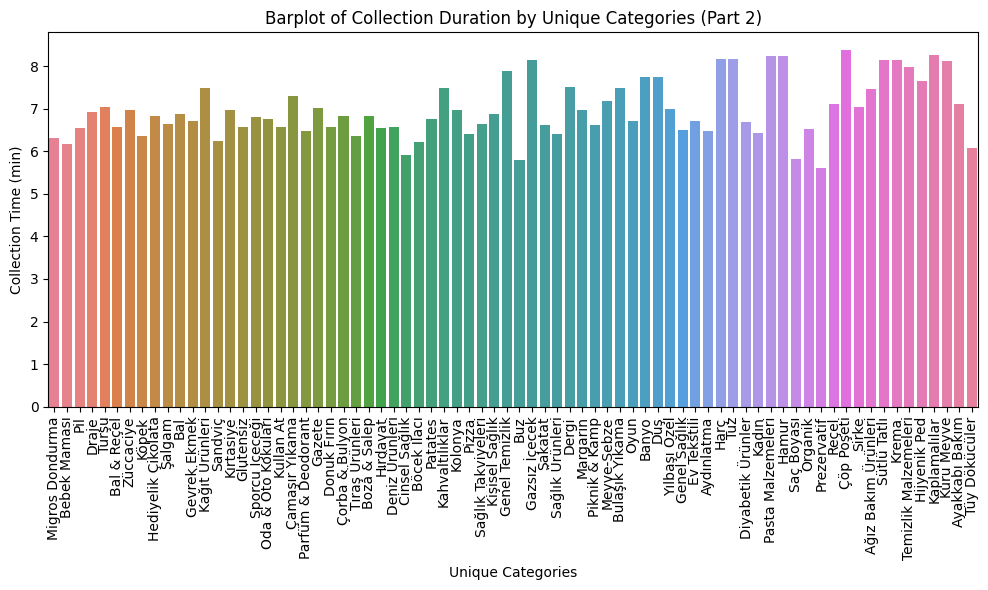

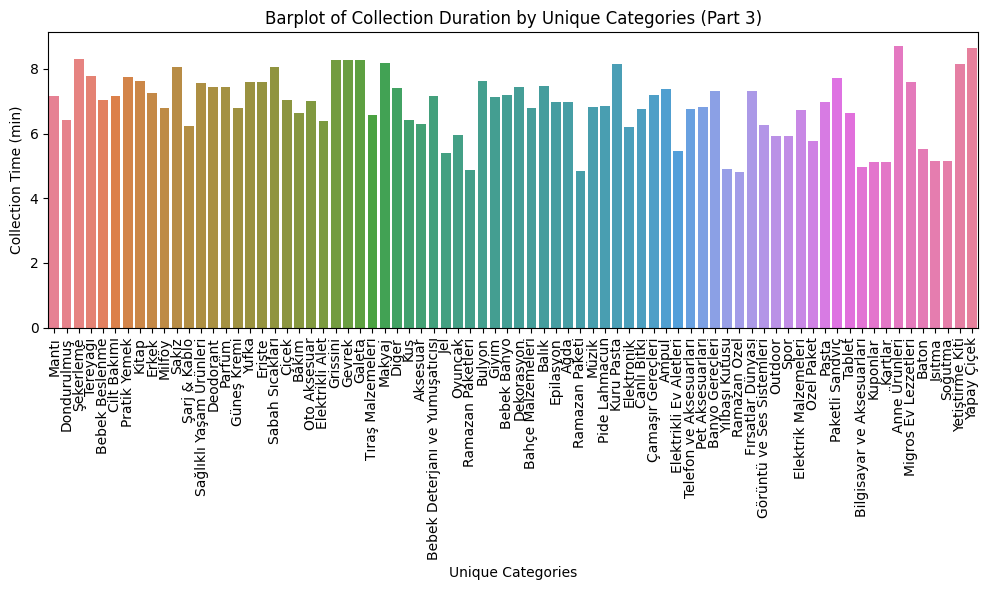

In [46]:
plot_barplot('Unique Categories', 'average_collection_time', unique_categories_counts_df, 'Unique Categories', True)

 Creating new feature with the calculation of average collection duration

In [47]:
# def calculate_metrics(row):
#     category_names = row['category_names']
#     if isinstance(category_names, str):
#         items = category_names.split(",")
#         average_collection_times = []
#         for item in items:
#             avg_time = unique_categories_counts_df.loc[unique_categories_counts_df['Unique Categories'] == item, 'average_collection_time'].values
#             if len(avg_time) > 0:
#                 average_collection_times.append(avg_time[0])

#         if average_collection_times:
#             avg_time = np.mean(average_collection_times)
#             return avg_time
#     return None

# df['average_collection_time'] = df.apply(calculate_metrics, axis=1)

In [48]:
df

,collection_duration,item_count,is_vip,category_names,Snacks,Baby,Icecream,Frozen_food,Meat&Fish,Home_Care,...,Technology,Staple_Food,Cleaning&Household_Supplies,Special_Days,Others,unique_category_count,month,day,hour,is_holiday
0,4.766667,6.0,False,"Duş & Banyo,Duş & Banyo,Saç Bakım,Saç Bakım,Pa...",0,0,0,0,0,0,...,0,0,0,0,0,1,7,Thursday,15,0
1,3.731673,7.0,False,"Gofret,Maden Suyu,Peynir,Kuruyemiş,Gofret,Yumurta",3,0,0,0,0,0,...,0,0,0,0,0,3,3,Tuesday,11,0
2,3.675279,3.0,False,"Bakliyat,Gevrekler,Süt",0,0,0,0,0,0,...,0,1,0,0,0,2,12,Saturday,14,0
3,5.766667,2.0,False,Beyaz Et,0,0,0,0,1,0,...,0,0,0,0,0,1,5,Monday,11,1
4,8.183333,5.0,False,"Makarna,Sebze,Konserve,Makarna",0,0,0,0,0,0,...,0,3,0,0,0,2,10,Wednesday,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379408,5.850000,8.0,False,"Bakliyat,Peynir,Bakliyat,Bakliyat,Peynir,Süt,Süt",0,0,0,0,0,0,...,0,3,0,0,0,2,3,Sunday,16,0
1379409,8.683333,7.0,False,"Sebze,Yumurta,Makarna,Makarna,Meyve,Peynir",0,0,0,0,0,0,...,0,2,0,0,0,3,3,Tuesday,19,0
1379410,5.030277,4.0,False,"Çikolata & Kahvaltı,Yumurta,Beyaz Et",0,0,0,0,1,0,...,0,0,0,0,0,2,3,Sunday,14,0
1379411,3.716667,7.0,False,"Dondurulmuş Gıda,Soğuk Kahve,Dondurulmuş Gıda,...",0,0,1,0,1,0,...,0,0,0,0,0,4,9,Friday,16,0


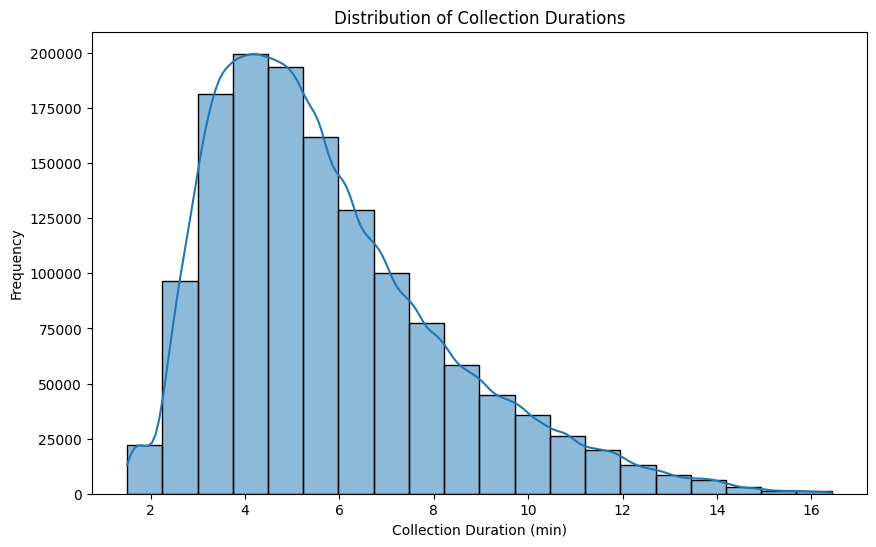

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['collection_duration'], bins=20, kde=True)
plt.title("Distribution of Collection Durations")
plt.xlabel("Collection Duration (min)")
plt.ylabel("Frequency")
plt.show()

# Normalization If Necessary

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# df[['item_count','cold_item','frozen_item','scalable_item']] = scaler.fit_transform(df[['item_count','cold_item','frozen_item','scalable_item']])

#normalize the all columns


# Save the Data

In [51]:
#order the data according to the paket_tarihi column which is the order date
# df = df.sort_values(by='packet_date')
df.to_csv('../data/preprocessed/main-data.csv', index=False)